In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../fem')
from heatconduction2d import main, postprocessdata, datasetgenerator
from randompolynomials import randompoly1DO3, randompoly2DO3
from gaussianrandomfields import GRF1D, GRF2D, grf2d

In [3]:
inputdataparams = {'type': 'grf',
                   'N_grfpoints': 21,
                   'l_theta': 0.4,
                   'positive_theta': True,
                   'l_f': 0.2,
                   'positive_f': True,
                   'l_eta': 0.2,
                   'positive_eta': False}
                   

simparams = {'nelems': 32,
             'etype': 'square',
             'btype': 'spline',
             'basisdegree': 1,
             'intdegree': 2,
             'nfemsamples': 2}

trainingdataparams = {'N_sensornodes': 144,
                      'N_outputnodes': 268,
                      'N_sims': 3}

params = {}
params['inputdataparams'] = inputdataparams
params['simparams'] = simparams
params['trainingdataparams'] = trainingdataparams

theta = grf2d(params['inputdataparams']['N_grfpoints'], params['inputdataparams']['l_theta'], params['inputdataparams']['positive_theta'])
f = grf2d#GRF2D(params['inputdataparams']['N_grfpoints'], params['inputdataparams']['l_f'], params['inputdataparams']['positive_f'])
etab = GRF1D(params['inputdataparams']['N_grfpoints'], params['inputdataparams']['l_eta'])
etat = GRF1D(params['inputdataparams']['N_grfpoints'], params['inputdataparams']['l_eta'])
gl = 0
gr = 0

inputs = {'theta': theta,
          'f': f,
          'etab': etab,
          'etat': etat,
          'gl': gl,
          'gr': gr}

outputs = main(params, inputs, save=False, savedir='../../../trainingdata', label='test')

# generatedataset(params, save=True, savedir='../../../trainingdata', label='test')

/home/prins/st8/anaconda3/lib/python3.10/site-packages/scipy/interpolate/_rbf.py:267: LinAlgWarning: Ill-conditioned matrix (rcond=1.46515e-20): result may not be accurate.
  self.nodes = linalg.solve(self.A, self.di)


NameError: name '__arg' is not defined

In [ ]:
data_postprocessed = postprocessdata(params, inputs, outputs)
data_postprocessed['Theta'].shape

In [ ]:
x = outputs['x']
u = outputs['u']

#plot
fig, axs = plt.subplots(1,3, figsize=(16, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.2)
size_title = 25
size_ticklabels = 15
size_axeslabels = 20

ax = axs[0]
plot0 = ax.tripcolor(x[:,0], x[:,1], theta(x[:,0],x[:,1]))
ax.set_title(r"$\theta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)

ax = axs[1]
plot1 = ax.tripcolor(x[:,0], x[:,1], f(x[:,0],x[:,1]))
ax.set_title(r"$f(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)

ax = axs[2]
ax.plot(x[:,0], etab(x[:,0]), label=r'$\eta_\mathrm{bottom}(x)$')
ax.plot(x[:,0], etat(x[:,0]), label=r'$\eta_\mathrm{top}(x)$')
ax.set_title(r"$\eta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$\eta(x)$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.legend(fontsize=15)
ax.set_box_aspect(1)

# plt.savefig("heatconduction_theta_f_eta.svg", bbox_inches='tight')

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], u)
ax.set_title(r"$u(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)

(-0.05, 1.05, -0.05, 1.05)

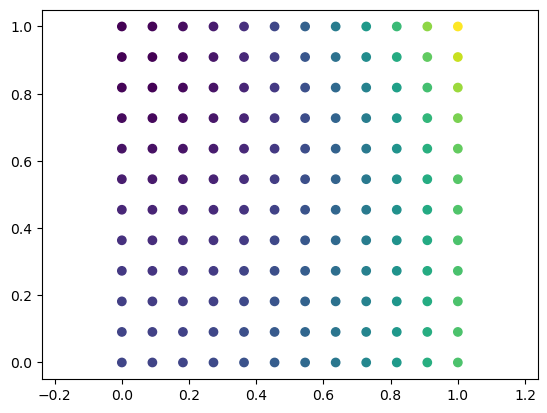

In [41]:
X, Y = np.mgrid[0:1:12j, 0:1:12j]
positions = np.vstack([X.ravel(), Y.ravel()])
plt.scatter(positions[0],positions[1], c=f(positions[0],positions[1]))
plt.axis('equal')

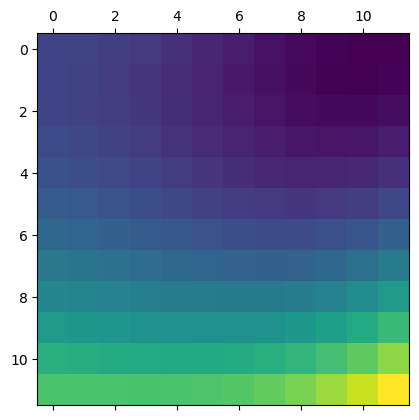

In [43]:
plt.matshow(f(positions[0],positions[1]).reshape(12,12))

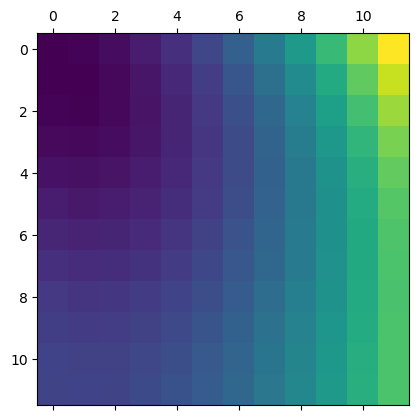

In [42]:
plt.matshow(np.rot90(f(positions[0],positions[1]).reshape(12,12)))

In [17]:
N_sensornodes = 144
N_outputnodes = 100

x_sensor, y_sensor = np.mgrid[0:1:np.sqrt(N_sensornodes)*1j, 0:1:np.sqrt(N_sensornodes)*1j]
sensornodes_Omega = np.vstack([x_sensor.ravel(), y_sensor.ravel()]).T
theta_sensor = theta(sensornodes_Omega[:,0], sensornodes_Omega[:,1])
f_sensor  = f(sensornodes_Omega[:,0], sensornodes_Omega[:,1])

sensornodes_Gamma = np.linspace(0,1,int(N_sensornodes/2))
etab_sensor = etab(sensornodes_Gamma)
etat_sensor = etat(sensornodes_Gamma)
eta_sensor = np.concatenate((etab_sensor, etat_sensor))

indices = np.linspace(0,x.shape[0]-1, x.shape[0], dtype=int)
indices_output = np.random.choice(indices, size=N_outputnodes, replace=False)
x_output = x[indices_output]
u_output = u[indices_output]

NameError: name 'x' is not defined

In [ ]:
plt.scatter(x[:,0],x[:,1], c=u)

In [ ]:
plt.scatter(x_output[:,0],x_output[:,1], c=u_output)